In [1]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
# import pyrosetta
import os
import csv
import sys

print(sys.version)

sns.set(style="whitegrid")

3.7.2 (default, Jan 13 2019, 12:50:15) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [2]:
def load_csv(file_name):
    data = {}
    with open(file_name) as f:
        reader = csv.reader(f)
        for line in reader:
            pname, cname, best_energy, best_rmsd, mean_energy, stddev_energy = line
            if pname not in data.keys():
                data[pname] = {}
            if cname not in data[pname].keys():
                data[pname][cname] = {}
            
            data[pname][cname]['best_energy'] = float(best_energy)
            data[pname][cname]['best_rmsd'] = float(best_rmsd)
            data[pname][cname]['mean_energy'] = float(mean_energy)
            data[pname][cname]['stddev_energy'] = float(stddev_energy)
            
    return data

In [3]:
# data = load_csv('data-own.csv')

In [4]:
data = pd.read_csv('data-literature.csv')
data

,protein,method,best_energy,best_rmsd,mean_energy,stddev_energy
0,1zdd,DE_C1,54.27,7.67,82.97,15.49
1,1zdd,DE_C2,65.77,9.42,82.76,9.22
2,1zdd,GA-APL,-40.40,10.90,-36.20,2.60
3,1zdd,MSA,-62.99,2.62,-48.96,7.77
4,1zdd,SADE-MC,-80.67,1.51,-69.36,5.50
5,1zdd,SADE-REMC,-82.46,1.16,-68.36,8.50
6,1crn,DE_C1,82.86,21.56,126.95,25.98
7,1crn,DE_C2,72.48,15.44,109.08,22.96
8,1crn,GA-APL,-22.70,5.80,-18.20,2.90
9,1crn,MSA,-76.93,6.96,-54.01,17.30


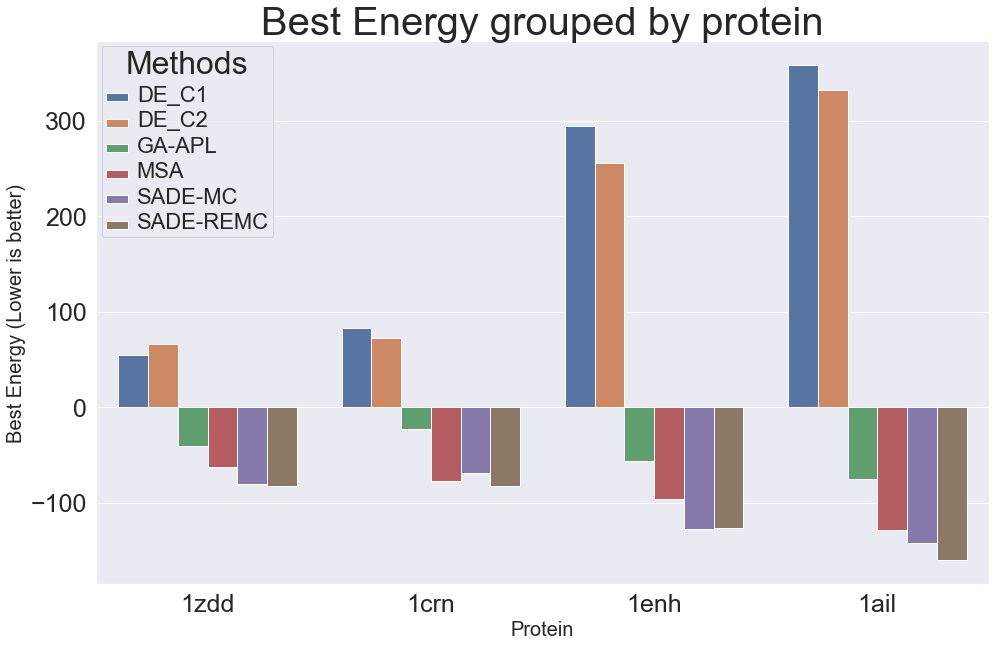

In [5]:
sns.set(rc={'figure.figsize':(16, 10)})
plot = sns.barplot(x='protein', y='best_energy', hue='method', data=data)
plot.set_title('Best Energy grouped by protein', fontsize=40)
plot.set_ylabel('Best Energy (Lower is better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp2_best_energy.png')

plot

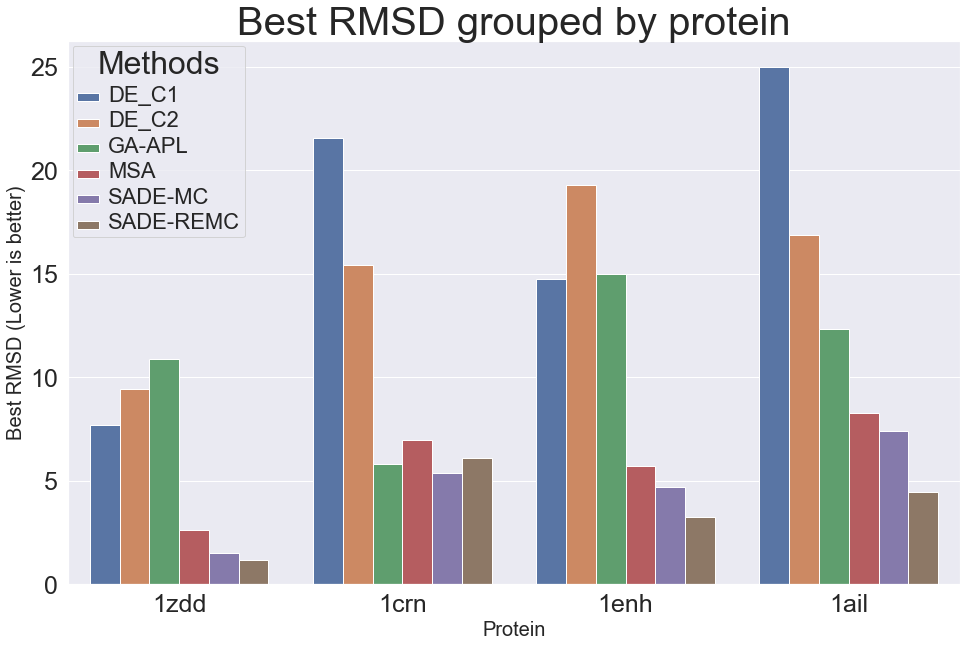

In [6]:
sns.set(rc={'figure.figsize':(16, 10)})
plot = sns.barplot(x='protein', y='best_rmsd', hue='method', data=data)
plot.set_title('Best RMSD grouped by protein', fontsize=40)
plot.set_ylabel('Best RMSD (Lower is better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp2_best_rmsd.png')

plot

gambi =  0
err =  4 [15.49 25.98 52.05 58.11]
data =  4 [82.97, 126.95, 372.11, 440.63]

gambi =  1
err =  4 [ 9.22 22.96 41.06 56.84]
data =  4 [82.76, 109.08, 320.38, 411.81]

gambi =  2
err =  4 [2.6  2.9  1.94 3.35]
data =  4 [-36.2, -18.2, -51.52, -71.08]

gambi =  3
err =  4 [ 7.77 17.3   8.48 10.28]
data =  4 [-48.96, -54.01, -80.75, -117.54]

gambi =  4
err =  4 [ 5.5  20.7  12.06 13.01]
data =  4 [-69.36, -45.29, -104.09, -118.39]

gambi =  5
err =  4 [ 8.5  55.94 10.04 25.01]
data =  4 [-68.36, -23.18, -98.75, -119.16]



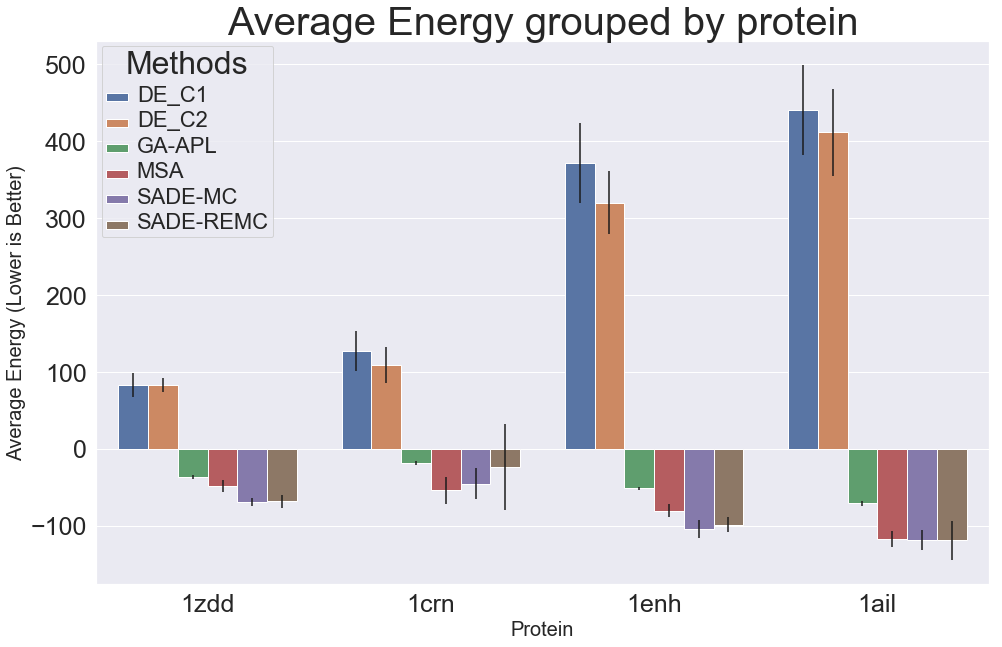

In [7]:
plot = sns.barplot(x='protein', y='mean_energy', hue='method', yerr=np.asarray(data['stddev_energy']), data=data)
plot.set_title('Average Energy grouped by protein', fontsize=40)
plot.set_ylabel('Average Energy (Lower is Better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp2_mean_energy.png')

plot